# Sequential Data Modeling with Recurrent Neural Networks

In [ ]:
import numpy as np
np.random.seed(123)

import matplotlib.pyplot as plt
import pandas as pd
import math

import tensorflow as tf
#tf.set_random_seed(1234)
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, SimpleRNN
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

%matplotlib inline

Let's start by print out the versions of the libraries we're using for future reference

# Create dataset

In [ ]:
X = np.arange(0, 360)
y = np.sin(X*np.pi/10)
df = pd.DataFrame({"X": X, "y":y})
#df = df.set_index("X")

In [ ]:
df.head(10)

,X,y
0,0,0.000000
1,1,0.309017
2,2,0.587785
3,3,0.809017
4,4,0.951057
5,5,1.000000
6,6,0.951057
7,7,0.809017
8,8,0.587785
9,9,0.309017


It's always important to see what you are doing. You can save a lot of time like this ;)

Text(0, 0.5, 'y')

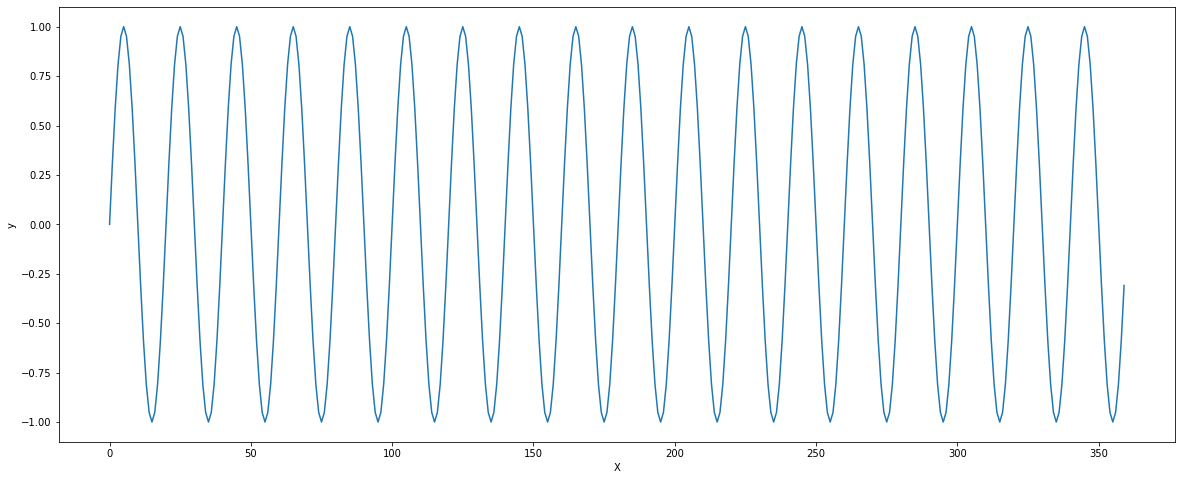

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(df.y)
plt.xlabel('X')
plt.ylabel('y')

## Training and Testing datasets 
The y values are just the next x value

In [ ]:
sinValues = pd.DataFrame(df.y.values)

df_new = pd.concat([sinValues.shift(1), sinValues], axis=1)
df_new.columns = ['t-1', 't']
df_new = df_new.dropna(how= 'any')
df_new.head(5)

,t-1,t
1,0.000000,0.309017
2,0.309017,0.587785
3,0.587785,0.809017
4,0.809017,0.951057
5,0.951057,1.000000


We'll be using the first 2/3 of the timeseries to train the model and the last 1/3 to evaluate it.

In [ ]:
n_points = len(df_new)
train_points = int(2/3*n_points)+1
X_train, X_test =df_new['t-1'].values[:train_points],  df_new['t-1'].values[train_points:  ]
y_train, y_test =df_new['t'].values[:train_points  ],  df_new['t'].values[train_points:  ]
print("We have", len(X_train), "training points and", X_test.shape[0], "testing points")

We have 240 training points and 119 testing points


The SimpleRNN model expects a 3D ([samples, time steps, features]) dataset so we reshape them accordingly 

The features corresponding at the number of feature that we want to predict

In [ ]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
keras.backend.clear_session()

X_train = X_train.reshape(X_train.shape[0],1, 1)
X_test = X_test.reshape(X_test.shape[0],1, 1)
print(X_train.shape)
print(X_test.shape)

(240, 1, 1)
(119, 1, 1)


We're only using one timestep

## Define the model architecture. 
We'll be using a SimpleRNN model with 10 hidden units. The Dense layer at the end has a linear activation function to aggregate the outputs of all the hidden units.

In [ ]:
model = Sequential()
model.add(SimpleRNN(units=10, input_shape=(X_train.shape[1], X_train.shape[2]))) #input_shape takes time steps and features
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [ ]:
nb_epoch = 100

model.fit(X_train, y_train, epochs=nb_epoch)

Epoch 1/100
8/8 [==============================] - 1s 2ms/step - loss: 0.5421
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5036
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4778
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4214
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 0.3828
Epoch 6/100
8/8 [==============================] - 0s 2ms/step - loss: 0.3556
Epoch 7/100
8/8 [==============================] - 0s 2ms/step - loss: 0.3231
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 0.2900
Epoch 9/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2562
Epoch 10/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2373
Epoch 11/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2036
Epoch 12/100
8/8 [==============================] - 0s 2ms/step - loss: 0.1998
Epoch 13/100
8/8 [==============================] - 0s 2ms/st

## Make predictions

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
mean_squared_error(y_train_pred , y_train)

0.04828331334267441

Compile the values

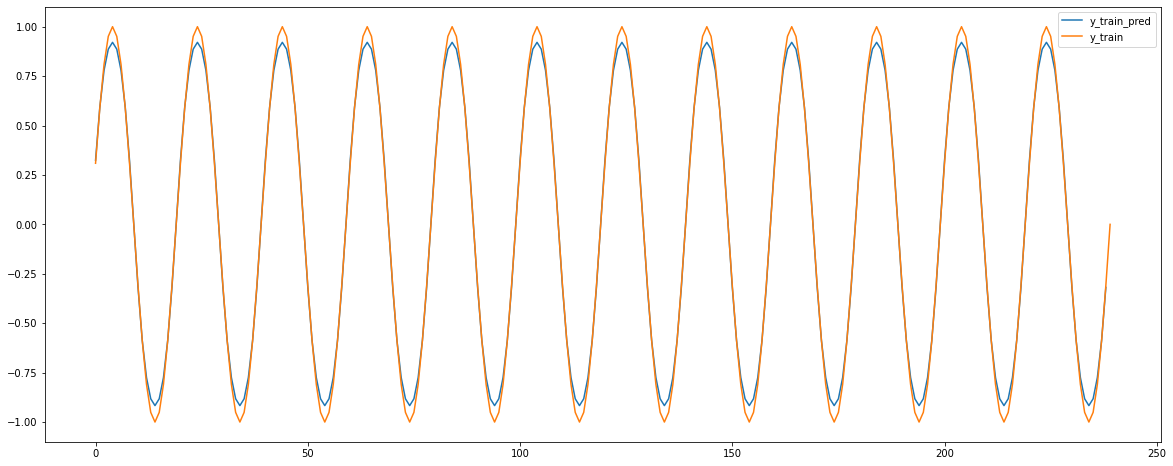

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y_train_pred[1:] , label ='y_train_pred')
plt.plot(y_train , label ='y_train')
plt.legend(loc='upper right')


In [ ]:
mean_squared_error(y_test_pred , y_test)

0.04783431192538835

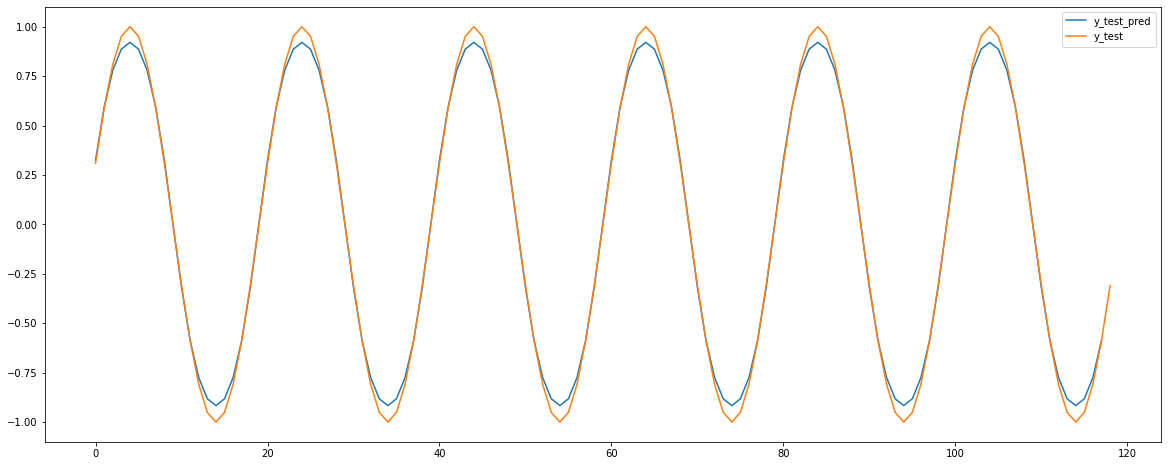

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y_test_pred[1:],label ='y_test_pred' )
plt.plot(y_test , label ='y_test')
plt.legend(loc='best')


# LSTM
Let's now try using a slightly more sophisticated architecture

In [ ]:
model = Sequential()
model.add(LSTM(4, input_shape=(X_train.shape[1], X_train.shape[2]))) #input_shape takes time steps and features
#model.add(LSTM(5))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
nb_epoch = 500

model.fit(X_train, y_train, epochs=nb_epoch)

Epoch 1/500
8/8 [==============================] - 2s 2ms/step - loss: 0.4677
Epoch 2/500
8/8 [==============================] - 0s 2ms/step - loss: 0.4616
Epoch 3/500
8/8 [==============================] - 0s 2ms/step - loss: 0.4877
Epoch 4/500
8/8 [==============================] - 0s 2ms/step - loss: 0.4343
Epoch 5/500
8/8 [==============================] - 0s 2ms/step - loss: 0.4624
Epoch 6/500
8/8 [==============================] - 0s 2ms/step - loss: 0.4472
Epoch 7/500
8/8 [==============================] - 0s 2ms/step - loss: 0.4455
Epoch 8/500
8/8 [==============================] - 0s 2ms/step - loss: 0.4215
Epoch 9/500
8/8 [==============================] - 0s 2ms/step - loss: 0.4218
Epoch 10/500
8/8 [==============================] - 0s 2ms/step - loss: 0.4188
Epoch 11/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3837
Epoch 12/500
8/8 [==============================] - 0s 2ms/step - loss: 0.4100
Epoch 13/500
8/8 [==============================] - 0s 2ms/st

Calculate the predicted values

In [ ]:
y_train_pred_LSTM = model.predict(X_train)
y_test_pred_LSTM = model.predict(X_test)


In [ ]:
mean_squared_error(y_train_pred_LSTM , y_train)

0.04845516782447248

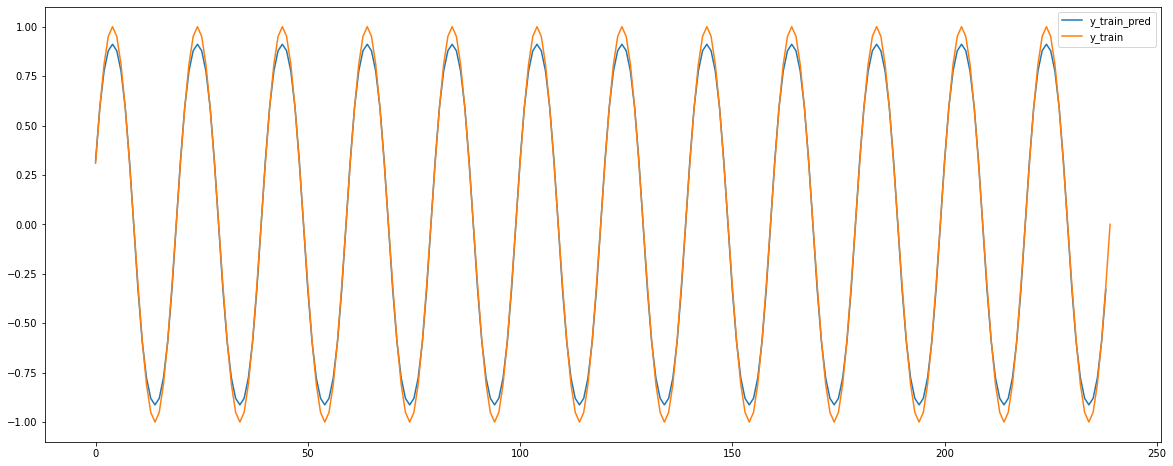

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y_train_pred_LSTM[1:] , label ='y_train_pred')
plt.plot(y_train , label ='y_train')
plt.legend(loc='upper right')


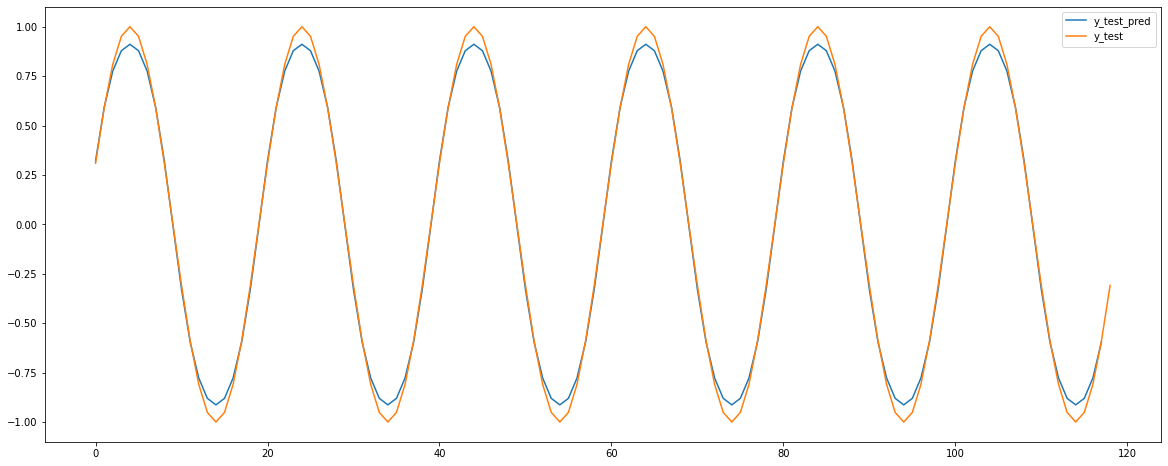

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y_test_pred_LSTM[1:],label ='y_test_pred' )
plt.plot(y_test , label ='y_test')
plt.legend(loc='best')


# Multiple timesteps
So far we've been using architectures with just a single timestep. Now we'll see how we can use multiple timesteps (t-1, t) to predict the value at t+1. We'll keep the basic architecture of the system. We still have the raw data in memory, so we don't need to reload it. We just have to be careful when we build the inputs

In [ ]:
sinValues = pd.DataFrame(df.y.values)

df_new = pd.concat([sinValues.shift(3),sinValues.shift(2) , sinValues.shift(1), sinValues], axis=1)
df_new.columns = ['t-3', 't-2' , 't-1' , 't']
df_new = df_new.dropna(how= 'any')
df_new.head(5)

,t-3,t-2,t-1,t
3,0.000000,0.309017,0.587785,0.809017
4,0.309017,0.587785,0.809017,0.951057
5,0.587785,0.809017,0.951057,1.000000
6,0.809017,0.951057,1.000000,0.951057
7,0.951057,1.000000,0.951057,0.809017


In [ ]:
n_points = len(df_new)
train_points = int(2/3*n_points)+1
X2_train, X2_test =df_new.iloc[:train_points , [0 , 1 , 2]], df_new.iloc[train_points :, [0 , 1 , 2]]
y2_train, y2_test =df_new.iloc[:train_points: , 3],  df_new.iloc[train_points: , 3]
print("We have", len(X_train), "training points and", X_test.shape[0], "testing points")

We have 240 training points and 119 testing points


The more we increas the lag, the more points we lose! The rest of the code looks pretty much the same

In [ ]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
keras.backend.clear_session()

X2_train = np.array(X2_train).reshape(X2_train.shape[0], X2_train.shape[1], 1)
X2_test = np.array(X2_test).reshape(X2_test.shape[0], X2_test.shape[1], 1)
print(X2_train.shape)
print(X2_test.shape)

(239, 3, 1)
(118, 3, 1)


But now we see that the result is slightly different. For each of our examples, we now have 3 timesteps to consider. Now we just need to refine the model:

In [ ]:
model = Sequential()
model.add(LSTM(units=10, input_shape=(X2_train.shape[1], X2_train.shape[2]))) #input_shape takes time steps and features
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10)                480       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [ ]:
nb_epoch = 200
model.fit(X2_train, y2_train, epochs=nb_epoch, shuffle=False)

Epoch 1/200
8/8 [==============================] - 2s 3ms/step - loss: 0.4702
Epoch 2/200
8/8 [==============================] - 0s 3ms/step - loss: 0.4474
Epoch 3/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4263
Epoch 4/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4064
Epoch 5/200
8/8 [==============================] - 0s 3ms/step - loss: 0.3875
Epoch 6/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3693
Epoch 7/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3518
Epoch 8/200
8/8 [==============================] - 0s 3ms/step - loss: 0.3347
Epoch 9/200
8/8 [==============================] - 0s 3ms/step - loss: 0.3181
Epoch 10/200
8/8 [==============================] - 0s 3ms/step - loss: 0.3020
Epoch 11/200
8/8 [==============================] - 0s 3ms/step - loss: 0.2864
Epoch 12/200
8/8 [==============================] - 0s 3ms/step - loss: 0.2715
Epoch 13/200
8/8 [==============================] - 0s 2ms/st

In [ ]:
y2_train_pred_LSTM = model.predict(X2_train)
y2_test_pred_LSTM = model.predict(X2_test)


In [ ]:
mean_squared_error(y2_train_pred_LSTM , y2_train)

0.00010311224438989223

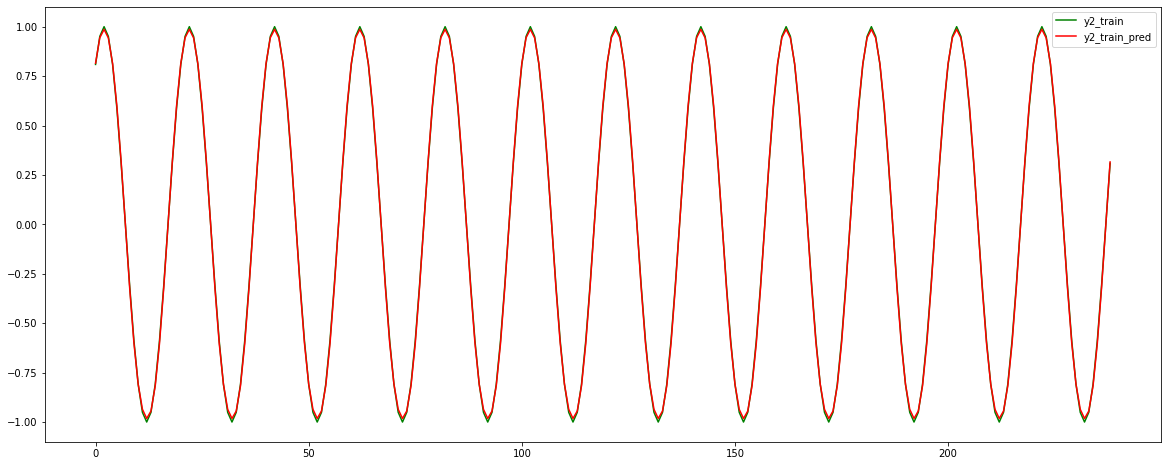

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(np.arange(len(y2_train)) , y2_train, label ='y2_train' , c='g')

plt.plot(np.arange(y2_train_pred_LSTM.shape[0]), y2_train_pred_LSTM, label ='y2_train_pred' , c='r')
plt.legend(loc='upper right')


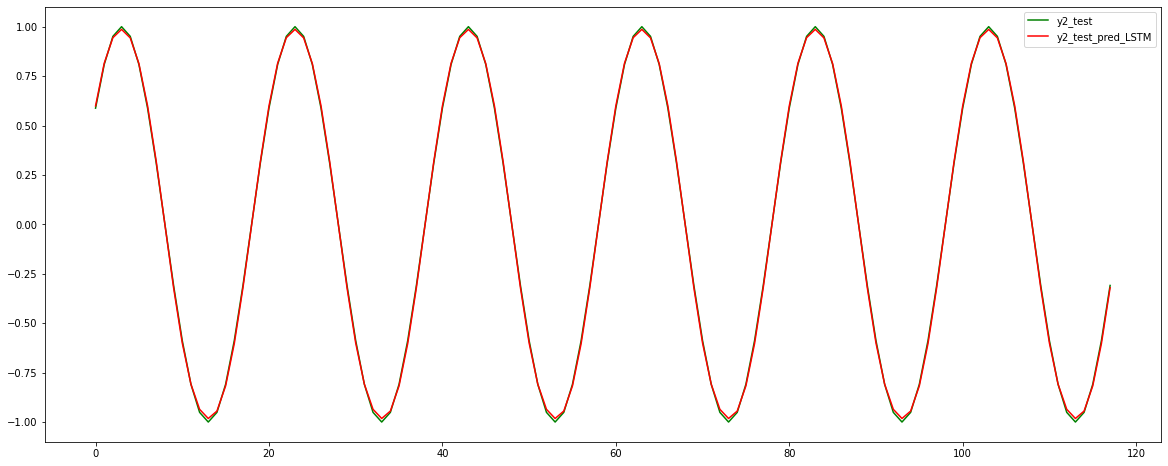

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(np.arange(len(y2_test)) , y2_test, label ='y2_test' , c='g')

plt.plot(np.arange(y2_test_pred_LSTM.shape[0]), y2_test_pred_LSTM, label ='y2_test_pred_LSTM' , c='r')
plt.legend(loc='upper right')


# Exercice:



1.   Load the dataset from Limbe at the url adress below and design your own RNN and LSTM model.
2.   Train a Vanilla RNN model, report the characteristics of your model,  the error during training and provide a picture of your forecast.
3.   Train a LSTM model, report the characteristics of your model,  the error made during training and forecasting.

4. Provide a picture of the  forecast for both models.

5. Apply a Preprocessing method of the climate product that you choose and re-do step 2 and 3.


6. What did you learn from these experiments?



url = 'https://raw.githubusercontent.com/rock-feller/Datasets_for_Education/main/data_02/limbe_data_JanApr21.csv'

In [ ]:
data='https://raw.githubusercontent.com/rock-feller/Datasets_for_Education/main/data_02/limbe_data_JanApr21.csv'
data_01=pd.read_csv(data)
data_01.head()

,LAT,LON,YEAR,MO,DY,WS50M_RANGE,WS10M_MIN,WS10M,WS50M,T2M_MAX,QV2M,WS50M_MAX,PRECTOT,T2M,WS10M_RANGE,T2M_MIN,WS10M_MAX,ALLSKY_SFC_SW_DWN,T2MDEW,PS,RH2M,WS50M_MIN,WS2M
0,4.03161,9.21461,2021,1,1,3.28,0.95,1.96,2.75,29.10,19.04,4.17,0.01,26.50,1.54,24.93,2.49,4.46,23.99,98.45,86.04,0.89,1.40
1,4.03161,9.21461,2021,1,2,2.82,1.13,1.87,2.52,29.32,18.78,3.96,0.01,26.47,1.28,24.79,2.41,5.01,23.77,98.47,85.04,1.15,1.33
2,4.03161,9.21461,2021,1,3,3.02,0.61,1.62,2.17,28.16,18.53,3.73,0.01,26.05,1.70,24.69,2.31,4.99,23.55,98.47,86.02,0.71,1.17
3,4.03161,9.21461,2021,1,4,4.22,0.07,1.38,1.89,29.79,18.36,4.25,0.01,26.50,2.61,24.51,2.67,4.94,23.40,98.37,82.89,0.04,0.97
4,4.03161,9.21461,2021,1,5,3.26,0.62,1.87,2.52,28.69,18.90,4.03,0.01,26.24,1.87,24.60,2.50,5.17,23.85,98.33,86.60,0.77,1.37


In [ ]:
Tmax=data_01[data_01['T2M_MAX']>0]['T2M_MAX']
Tmax.head()

0    29.10
1    29.32
2    28.16
3    29.79
4    28.69
Name: T2M_MAX, dtype: float64

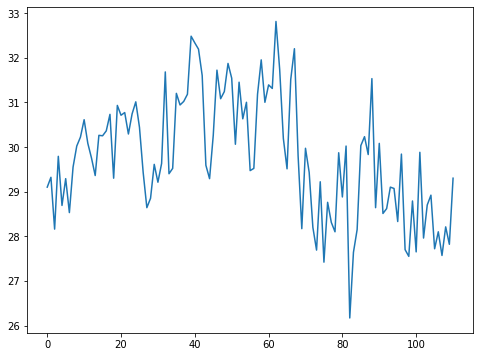

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(Tmax)


In [ ]:
def ReScaleAroundZero(data, a):
    data_avg = data.mean()
    scaled_data = a*(data - data_avg)
    return scaled_data


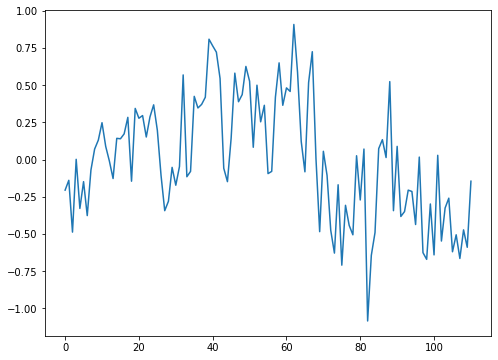

In [ ]:
MaxTemp_Rescaled  = ReScaleAroundZero(Tmax , 0.3)
plt.figure(figsize=(8,6))
plt.plot(MaxTemp_Rescaled)

In [ ]:
def ReScaleAroundZeroPlot(a):
    plt.figure(figsize=(8,6))
    data_avg = Tmax.mean()
    scaled_data = a*(Tmax - data_avg)
    return plt.plot(scaled_data)

In [ ]:
interact(ReScaleAroundZeroPlot ,  a=(0,1, 0.1) )

interactive(children=(FloatSlider(value=0.0, description='a', max=1.0), Output()), _dom_classes=('widget-inter…

<function __main__.ReScaleAroundZeroPlot>

In [ ]:
sinValues = pd.DataFrame(MaxTemp_Rescaled.values)

df_new1 = pd.concat([sinValues.shift(10),sinValues.shift(9) , sinValues.shift(8),sinValues.shift(7),sinValues.shift(6),sinValues.shift(5),sinValues.shift(4),sinValues.shift(3),sinValues.shift(2), sinValues.shift(1),sinValues], axis=1)
df_new1.columns = ['t-10', 't-9','t-8','t-7','t-6','t-5','t-4','t-3','t-2' , 't-1' , 't']
df_new1 = df_new1.dropna(how= 'any')
df_new1.head(5)

,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
10,-0.205568,-0.139568,-0.487568,0.001432,-0.328568,-0.148568,-0.376568,-0.070568,0.070432,0.130432,0.247432
11,-0.139568,-0.487568,0.001432,-0.328568,-0.148568,-0.376568,-0.070568,0.070432,0.130432,0.247432,0.088432
12,-0.487568,0.001432,-0.328568,-0.148568,-0.376568,-0.070568,0.070432,0.130432,0.247432,0.088432,-0.010568
13,0.001432,-0.328568,-0.148568,-0.376568,-0.070568,0.070432,0.130432,0.247432,0.088432,-0.010568,-0.127568
14,-0.328568,-0.148568,-0.376568,-0.070568,0.070432,0.130432,0.247432,0.088432,-0.010568,-0.127568,0.142432


In [ ]:
n_points = len(df_new1)
train_points = int(2/3*n_points)+1
X_train1, X_test1 =df_new1.iloc[:train_points , [0 , 1 , 2,3,4,5,6,7,8,9]], df_new1.iloc[train_points :, [0 , 1 , 2,3,4,5,6,7,8,9]]
y_train1, y_test1 =df_new1.iloc[:train_points: , 10],  df_new1.iloc[train_points: , 10]
print("We have", len(X_train1), "training points and", X_test1.shape[0], "testing points")

We have 68 training points and 33 testing points


In [ ]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
keras.backend.clear_session()

X_train1 = np.array(X_train1).reshape(X_train1.shape[0], X_train1.shape[1], 1)
X_test1 = np.array(X_test1).reshape(X_test1.shape[0], X_test1.shape[1], 1)
print(X_train1.shape)
print(X_test1.shape)

(68, 10, 1)
(33, 10, 1)


In [ ]:
model = Sequential()
model.add(SimpleRNN(units=10, input_shape=(X_train1.shape[1], X_train1.shape[2]))) #input_shape takes time steps and features
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='sgd')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 10)                120       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [ ]:
nb_epoch = 200

model.fit(X_train1, y_train1, epochs=nb_epoch)

Epoch 1/200
3/3 [==============================] - 1s 5ms/step - loss: 0.1350
Epoch 2/200
3/3 [==============================] - 0s 4ms/step - loss: 0.1172
Epoch 3/200
3/3 [==============================] - 0s 4ms/step - loss: 0.1035
Epoch 4/200
3/3 [==============================] - 0s 4ms/step - loss: 0.1006
Epoch 5/200
3/3 [==============================] - 0s 5ms/step - loss: 0.1028
Epoch 6/200
3/3 [==============================] - 0s 3ms/step - loss: 0.0976
Epoch 7/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0980
Epoch 8/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0922
Epoch 9/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0978
Epoch 10/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0912
Epoch 11/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0952
Epoch 12/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0980
Epoch 13/200
3/3 [==============================] - 0s 3ms/st

In [ ]:
y_train_pred1 = model.predict(X_train1)
y_test_pred1 = model.predict(X_test1)

In [ ]:
y_train_pred1

In [ ]:
mean_squared_error(y_train_pred1 , y_train1)

0.07428971594465852

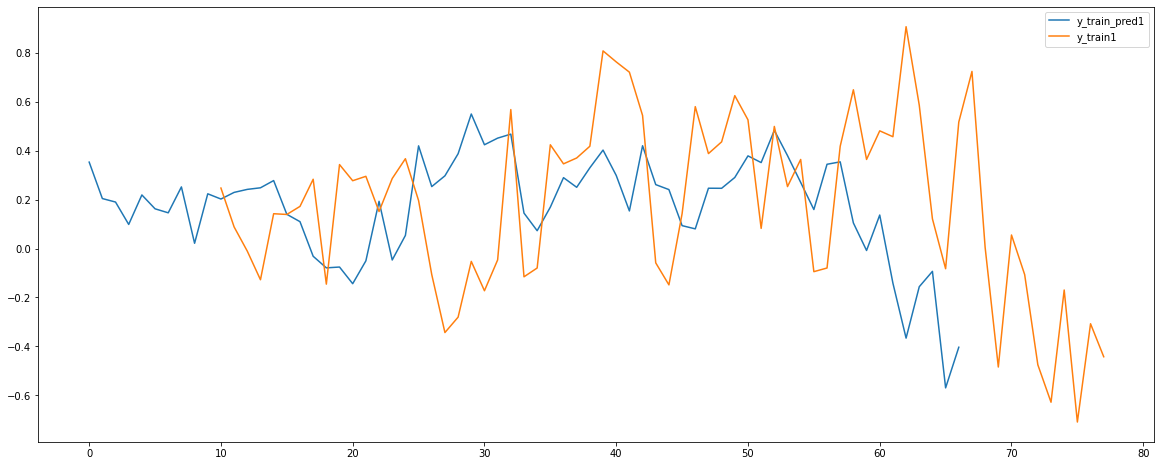

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y_train_pred1[1:] , label ='y_train_pred1')
plt.plot(y_train1 , label ='y_train1')
plt.legend(loc='upper right')


LSTM

In [ ]:
model = Sequential()
model.add(LSTM(4, input_shape=(X_train1.shape[1], X_train1.shape[2]))) #input_shape takes time steps and features
#model.add(LSTM(5))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
nb_epoch = 200

model.fit(X_train1, y_train1, epochs=nb_epoch)

Epoch 1/200
3/3 [==============================] - 2s 6ms/step - loss: 0.2384
Epoch 2/200
3/3 [==============================] - 0s 5ms/step - loss: 0.2331
Epoch 3/200
3/3 [==============================] - 0s 5ms/step - loss: 0.2033
Epoch 4/200
3/3 [==============================] - 0s 5ms/step - loss: 0.1981
Epoch 5/200
3/3 [==============================] - 0s 5ms/step - loss: 0.1865
Epoch 6/200
3/3 [==============================] - 0s 6ms/step - loss: 0.1918
Epoch 7/200
3/3 [==============================] - 0s 5ms/step - loss: 0.1782
Epoch 8/200
3/3 [==============================] - 0s 6ms/step - loss: 0.1611
Epoch 9/200
3/3 [==============================] - 0s 5ms/step - loss: 0.1764
Epoch 10/200
3/3 [==============================] - 0s 5ms/step - loss: 0.1605
Epoch 11/200
3/3 [==============================] - 0s 6ms/step - loss: 0.1618
Epoch 12/200
3/3 [==============================] - 0s 6ms/step - loss: 0.1660
Epoch 13/200
3/3 [==============================] - 0s 5ms/st

In [ ]:
y_train_pred1 = model.predict(X_train1)
y_test_pred1 = model.predict(X_test1)

In [ ]:
mean_squared_error(y_train_pred1 , y_train1)

0.08655047339286001

In [ ]:
mean_squared_error(y_test_pred1, y_test1)

0.11462247076923435

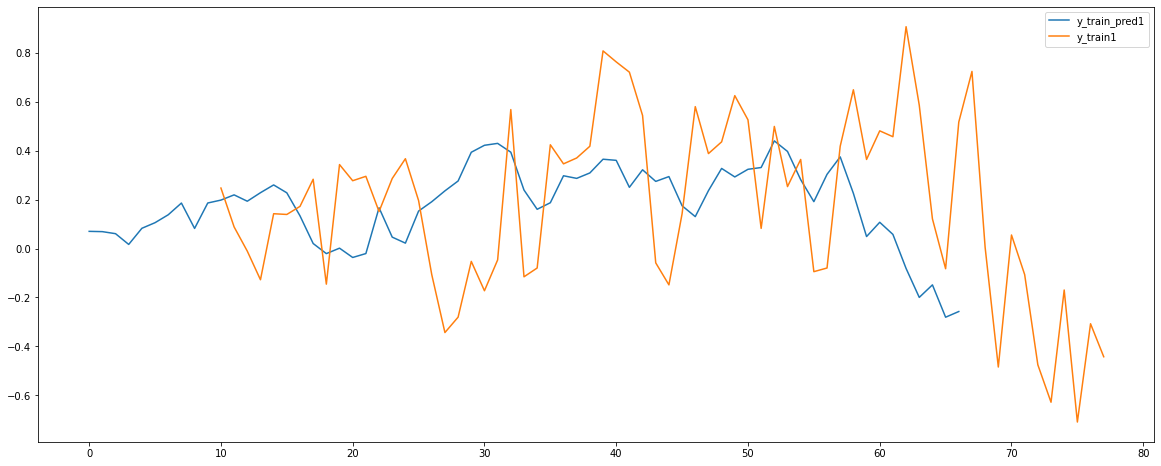

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y_train_pred1[1:] , label ='y_train_pred1')
plt.plot(y_train1 , label ='y_train1')
plt.legend(loc='upper right')


(array([ 1.,  1., 13., 14., 18., 21., 15., 14.,  9.,  5.]),
 array([26.17 , 26.834, 27.498, 28.162, 28.826, 29.49 , 30.154, 30.818,
        31.482, 32.146, 32.81 ]),
 <a list of 10 Patch objects>)

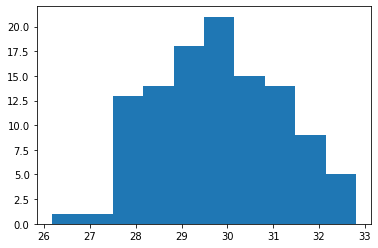

In [ ]:
plt.hist(Tmax)

The end...